<a href="https://colab.research.google.com/github/EhsanEs-hub/ML-practice-folder/blob/master/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Long Short Term Memory (LSTM)
# to Predict closing stock price of a corporation (Apple Inc). Using the past 60 days stock price.

In [0]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2019-12-18,281.899994,279.119995,279.799988,279.739990,29007100.0,278.324249
2019-12-19,281.179993,278.950012,279.500000,280.019989,24592300.0,278.602814
2019-12-20,282.649994,278.559998,282.230011,279.440002,68994500.0,278.025757


In [0]:
df.shape

(2008, 6)

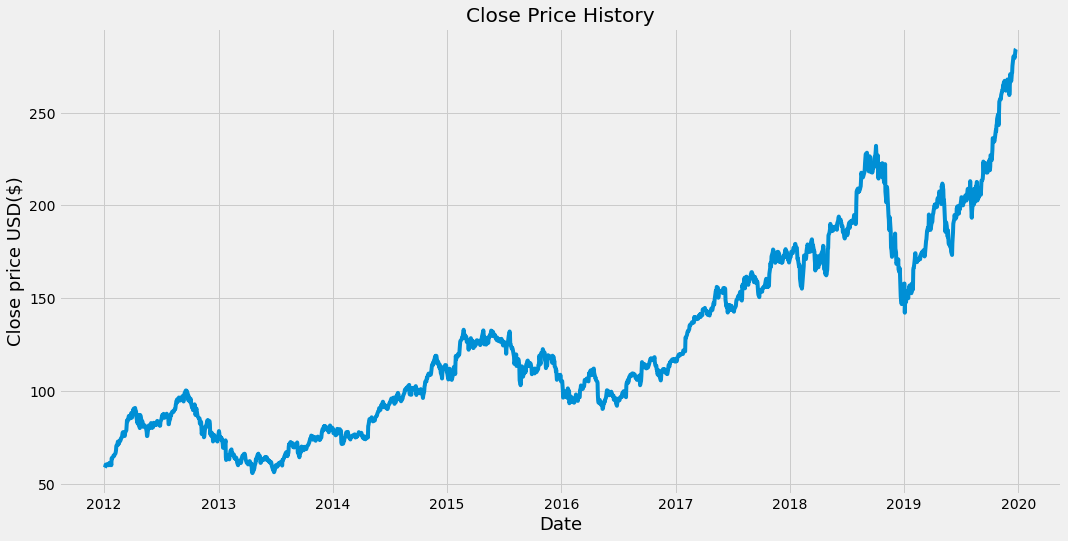

In [0]:
# Visualize close price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.show()

In [0]:
# Create a new dataframe with only the 'close column
data = df.filter(['Close'])
# Convert DataFrame to np Array
dataset = data.values
# Get the number of rows to Train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1607

In [0]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.01294267],
       [0.01432448],
       [0.01719437],
       ...,
       [0.97886035],
       [0.99881833],
       [1.        ]])

In [0]:
# Creating the scaled training data set
train_data = scaled_data[0:training_data_len , :] # : means get all the columns
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
 x_train.append(train_data[i-60:i, 0])
 y_train.append(train_data[i, 0])
 if i<=61:
   print(x_train)
   print(y_train)
   print()


[array([0.01294267, 0.01432448, 0.01719437, 0.01992672, 0.0195078 ,
       0.02045192, 0.0200205 , 0.01929521, 0.01830733, 0.02136479,
       0.02412215, 0.02327181, 0.0186137 , 0.02305922, 0.01868247,
       0.03509528, 0.03382602, 0.03548295, 0.03906562, 0.04123523,
       0.04105391, 0.0403849 , 0.04323604, 0.04591835, 0.04895709,
       0.0538653 , 0.06417567, 0.06433198, 0.07007179, 0.07436099,
       0.06698928, 0.06982793, 0.06977166, 0.07773111, 0.07659939,
       0.07869396, 0.08245797, 0.08455258, 0.09058624, 0.09498176,
       0.09625099, 0.09669493, 0.08917944, 0.08736619, 0.08763506,
       0.09470037, 0.09668869, 0.10095912, 0.11102566, 0.12445604,
       0.12194253, 0.12194877, 0.13165892, 0.13469762, 0.13253426,
       0.13055849, 0.12850141, 0.13533537, 0.14002477, 0.14198806])]
[0.13713610318970354]

[array([0.01294267, 0.01432448, 0.01719437, 0.01992672, 0.0195078 ,
       0.02045192, 0.0200205 , 0.01929521, 0.01830733, 0.02136479,
       0.02412215, 0.02327181, 0.01

In [0]:
# Convert the x_train and y_train to np arrays
x_train , y_train = np.array(x_train) , np.array(y_train)
x_train.shape

(1547, 60)

In [0]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1547, 60, 1)

In [0]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [0]:
# Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [0]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1547/1547 [==============================] - 62s 40ms/step - loss: 7.1360e-04


In [0]:
# Create the test data set
# Create a new array containing scaled values fom index 1547 to 2007
test_data = scaled_data[training_data_len-60: , :]
# Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the x_test to np arrays
x_test = np.array(x_test) 

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# plot the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( predictions - y_test)**2)
rmse

1.9015480098581672

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


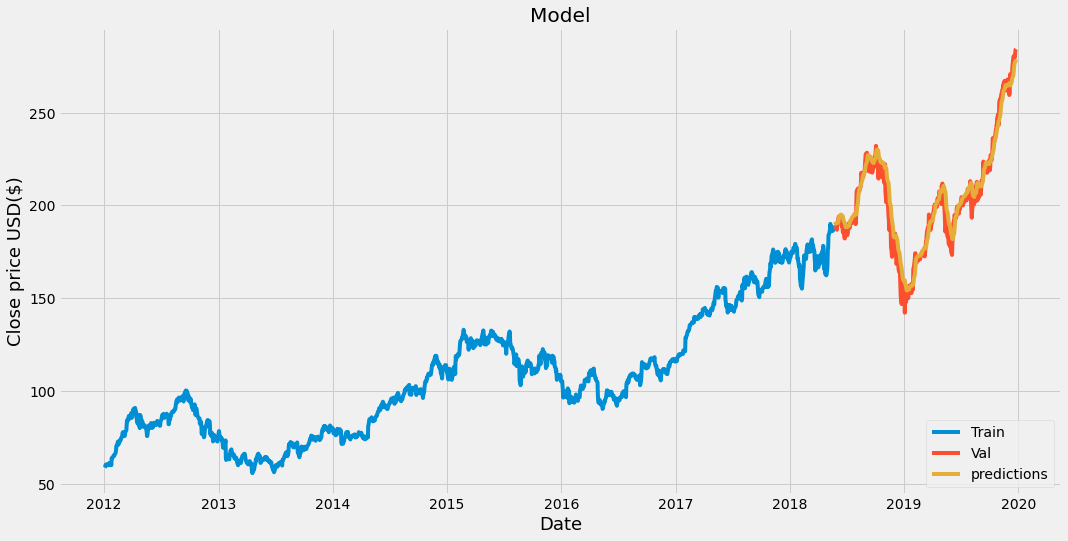

In [0]:
# plot ihe data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
# Visualize close price history
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [0]:
# show the valid and predicted price
valid

,Close,predictions
Date,,
2018-05-23,188.360001,189.752609
2018-05-24,188.149994,189.897629
2018-05-25,188.580002,190.079346
2018-05-29,187.899994,190.323868
2018-05-30,187.500000,190.489090
...,...,...
2019-12-18,279.739990,274.000488
2019-12-19,280.019989,275.570129
2019-12-20,279.440002,276.798981


In [38]:
# Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-24')
# Create a new dataframe with only the 'close column
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing value & Convert DataFrame to np Array
last_60_days = new_df[-60:].values
# Get the number of rows to Train the model on
# training_data_len = math.ceil(len(dataset) * .8)
# Scale the data
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(dataset)
last_60_days_scaled_data = scaler.transform(last_60_days)
# Create empiy list
X_test = []
X_test.append(last_60_days_scaled_data)
# Convert the X_test to np arrays
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# plot the predictions
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[279.81927]]


In [37]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-26')
print(apple_quote2['Close'])

Date
2012-01-03     58.747143
2012-01-04     59.062859
2012-01-05     59.718571
2012-01-06     60.342857
2012-01-09     60.247143
                 ...    
2019-12-19    280.019989
2019-12-20    279.440002
2019-12-23    284.000000
2019-12-24    284.269989
2019-12-26    289.910004
Name: Close, Length: 2009, dtype: float64
